In [67]:
import pandas as pd
import numpy as np
from data_fetcher import DataFetcher


In [13]:
BROAD_DIR = "/Users/cankoc/Coursework/cellpainting-gallery/cpg0019-moshkov-deepprofiler/broad"
metadata_df = DataFetcher.get_sc_metadata(BROAD_DIR)
metadata_df["PathId"] = metadata_df.apply(
    lambda x: x["Image_Name"].split("/")[-1], axis=1
)

In [72]:
c037_df = metadata_df[metadata_df["Collection"] == "BBBC037"]
print(c037_df.shape)
print(c037_df["Metadata_Plate"].unique())

(256824, 14)
['41744' '41754' '41755' '41756' '41757']


In [148]:
selected_plates = ['41744', '41754', '41755']
c037_selected_df = metadata_df[(metadata_df["Collection"] == "BBBC037") & metadata_df["Metadata_Plate"].isin(selected_plates)]
print(c037_selected_df.shape)
c037_selected_df.head()

(155929, 14)


,Collection,Metadata_Plate,Metadata_Well,Metadata_Site,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Image_Name,Treatment,Treatment_Type,Control,Cell_line,LeaveReplicatesOut,LeaveCellsOut,PathId
8166631,BBBC037,41744,a01,1,377,30,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,Training,105@377x30.png
8166632,BBBC037,41744,a01,1,1032,34,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@1032x34.png
8166633,BBBC037,41744,a01,1,986,45,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@986x45.png
8166634,BBBC037,41744,a01,1,799,50,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@799x50.png
8166635,BBBC037,41744,a01,1,483,83,../../training_images/BBBC037/41744/a01/1/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@483x83.png


In [149]:
print(sorted(c037_selected_df["Treatment"].unique()))
len(sorted(c037_selected_df["Treatment"].unique()))

['AKT1_E17K', 'AKT1_WT', 'ARAF_WT', 'ATF2_WT', 'ATF6_1-373', 'BCL2L11_WT', 'BRAF_V600E', 'BRAF_WT', 'CASP8_WT', 'CCND1_WT', 'CDC42_Q61L', 'CDC42_T17N', 'CDC42_WT', 'CDKN1A_WT', 'CEBPA_WT', 'CSNK1E_WT', 'CTNNB1_WT', 'CXXC4_WT', 'E2F1_WT', 'ELK1_WT', 'EMPTY', 'ERBB2_WT', 'GSK3B_WT', 'HRAS_G12V', 'JUN_WT', 'KRAS_G12V', 'KRAS_WT', 'MAP2K1_WT', 'MAP3K2_WT', 'MAP3K9_WT', 'MAPK1_WT', 'MYD88_WT', 'NOTCH1_ICN1', 'PIK3CA_WT', 'PPARGC1A_WT', 'PRKACA_WT', 'PRKCE_WT', 'PTEN_WT', 'RAC1_Q61L', 'RAF1_L613V', 'RAF1_WT', 'RB1_WT', 'RHOA_Q63L', 'RHOA_WT', 'SMAD4_WT', 'STK11_WT', 'XBP1_WT']


47

In [150]:
print("Only Wildtypes:")
treatment_types_splitted = [t.split('_WT') for t in c037_selected_df["Treatment"].unique()]
wildtypes = [split_list[0] + "_WT" if len(split_list) > 1 else "" for split_list in treatment_types_splitted]
wildtypes = [item for item in wildtypes if item != '']
wildtypes.sort()
print(wildtypes)
print()
perturbations = [split_list[0] if len(split_list) == 1 else "" for split_list in treatment_types_splitted]
perturbations = [item for item in perturbations if item != '']
perturbations.sort()
print("Only perturbations:")
print(perturbations)

Only Wildtypes:
['AKT1_WT', 'ARAF_WT', 'ATF2_WT', 'BCL2L11_WT', 'BRAF_WT', 'CASP8_WT', 'CCND1_WT', 'CDC42_WT', 'CDKN1A_WT', 'CEBPA_WT', 'CSNK1E_WT', 'CTNNB1_WT', 'CXXC4_WT', 'E2F1_WT', 'ELK1_WT', 'ERBB2_WT', 'GSK3B_WT', 'JUN_WT', 'KRAS_WT', 'MAP2K1_WT', 'MAP3K2_WT', 'MAP3K9_WT', 'MAPK1_WT', 'MYD88_WT', 'PIK3CA_WT', 'PPARGC1A_WT', 'PRKACA_WT', 'PRKCE_WT', 'PTEN_WT', 'RAF1_WT', 'RB1_WT', 'RHOA_WT', 'SMAD4_WT', 'STK11_WT', 'XBP1_WT']

Only perturbations:
['AKT1_E17K', 'ATF6_1-373', 'BRAF_V600E', 'CDC42_Q61L', 'CDC42_T17N', 'EMPTY', 'HRAS_G12V', 'KRAS_G12V', 'NOTCH1_ICN1', 'RAC1_Q61L', 'RAF1_L613V', 'RHOA_Q63L']


In [ ]:
c037_wildtypes_df = c037_selected_df[c037_selected_df["Treatment"].isin(wildtypes)]
print(c037_wildtypes_df.shape)
print("Top 3 Wildtypes")
print(c037_wildtypes_df["Treatment"].value_counts())
print(f"Total: {sum(c037_wildtypes_df['Treatment'].value_counts())}")
print()
print("Top 5 Perturbations + EMPTY")
c037_perturbations_df = c037_selected_df[c037_selected_df["Treatment"].isin(perturbations)]
print(c037_perturbations_df.shape)
print(c037_perturbations_df["Treatment"].value_counts())
print(f"Total: {sum(c037_perturbations_df['Treatment'].value_counts()) + 1000}")

### Extract Top 10 Treatments and prepare metadata

In [154]:
empty_treatment_label = "EMPTY"
top_treatment_labels = ["AKT1_WT", "AKT1_E17K", 
                        "BRAF_WT","BRAF_V600E", 
                        "CDC42_WT", "CDC42_Q61L", "CDC42_T17N", 
                        "KRAS_WT", "KRAS_G12V", 
                        "RAF1_WT", "RAF1_L613V", 
                        "RHOA_WT", "RHOA_Q63L"
                        ]
class_labels = top_treatment_labels.copy()
class_labels.append(empty_treatment_label)
class_labels

['AKT1_WT',
 'AKT1_E17K',
 'BRAF_WT',
 'BRAF_V600E',
 'CDC42_WT',
 'CDC42_Q61L',
 'CDC42_T17N',
 'KRAS_WT',
 'KRAS_G12V',
 'RAF1_WT',
 'RAF1_L613V',
 'RHOA_WT',
 'RHOA_Q63L',
 'EMPTY']

#### Sample 1k from EMPTY

In [174]:
sample_size = 1000
empty_treatments_sampled_df = c037_selected_df[c037_selected_df["Treatment"] == empty_treatment_label].sample(n=sample_size, random_state=42)

#### Sample 1k images from each label

In [175]:
sample_size = 1000
c037_14k_dataset = empty_treatments_sampled_df.copy()
c037_selected_labels_df = c037_selected_df[c037_selected_df["Treatment"].isin(class_labels)]
print(f"Before sampling, total dataset: {c037_selected_labels_df.shape}")

for label in class_labels:
    if label == empty_treatment_label:
        # Do not re-add empty
        continue
    sampled_label_df = c037_selected_df[c037_selected_df["Treatment"] == label].sample(n=sample_size, random_state=42)
    c037_14k_dataset = pd.concat([c037_14k_dataset, sampled_label_df])

print(f"After sampling, total dataset: {c037_14k_dataset.shape}")
c037_14k_dataset.head()

Before sampling, total dataset: (94304, 14)
After sampling, total dataset: (14000, 14)


,Collection,Metadata_Plate,Metadata_Well,Metadata_Site,Nuclei_Location_Center_X,Nuclei_Location_Center_Y,Image_Name,Treatment,Treatment_Type,Control,Cell_line,LeaveReplicatesOut,LeaveCellsOut,PathId
8176496,BBBC037,41744,c14,8,353,247,../../training_images/BBBC037/41744/c14/8/105@...,EMPTY,ORF,Control,U2OS,Training,Training,105@353x247.png
8267817,BBBC037,41754,p21,1,772,609,../../training_images/BBBC037/41754/p21/1/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@772x609.png
8302788,BBBC037,41755,i06,5,899,208,../../training_images/BBBC037/41755/i06/5/105@...,EMPTY,ORF,Control,U2OS,Training,Training,105@899x208.png
8265978,BBBC037,41754,o24,3,256,826,../../training_images/BBBC037/41754/o24/3/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@256x826.png
8258638,BBBC037,41754,l18,5,848,55,../../training_images/BBBC037/41754/l18/5/105@...,EMPTY,ORF,Control,U2OS,Training,NotUsed,105@848x55.png


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

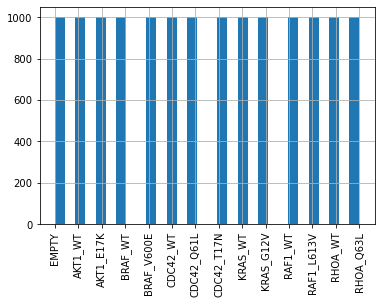

In [176]:
import matplotlib.pyplot as plt
ax = c037_14k_dataset["Treatment"].hist(bins=30)
plt.xticks(rotation = "vertical")

In [177]:
c037_14k_dataset.to_parquet("./data/c037_14k_metadata.parquet", engine="pyarrow")

In [178]:
c037_14k_dataset["Treatment"].value_counts()

EMPTY         1000
AKT1_WT       1000
AKT1_E17K     1000
BRAF_WT       1000
BRAF_V600E    1000
CDC42_WT      1000
CDC42_Q61L    1000
CDC42_T17N    1000
KRAS_WT       1000
KRAS_G12V     1000
RAF1_WT       1000
RAF1_L613V    1000
RHOA_WT       1000
RHOA_Q63L     1000
Name: Treatment, dtype: int64